In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download



In [5]:
data=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\blogs.csv")
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
data['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [11]:
# Text preprocessing
download('stopwords')
download('punkt')
download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91755\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91755\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91755\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return ' '.join(tokens)

data['Cleaned_Text'] = data['Data'].apply(preprocess_text)
data['Cleaned_Text']

0       path agate uknet mcsun frank frank frank newsg...
1       newsgroups path constellation darkside bil bil...
2       path uunet olivea decwrl jimh jimh james hogan...
3       path usc venice jbrown jbrown newsgroups subje...
4       xref newsgroups path rphroy caen uunet pipex u...
                              ...                        
1995    xref path agate uknet mcsun frank frank frank ...
1996    xref newsgroups path rochester udel purdue mec...
1997    xref path gatech purdue scharle scharle scharl...
1998    xref path udel psinntp foster foster newsgroup...
1999    xref path rochester udel gatech usc uunet afte...
Name: Cleaned_Text, Length: 2000, dtype: object

In [23]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(data['Cleaned_Text'])
y = data['Labels']
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.60      0.67      0.63        18
 comp.os.ms-windows.misc       0.60      0.82      0.69        22
comp.sys.ibm.pc.hardware       0.70      0.56      0.62        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.79      0.60      0.68        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.82      0.88      0.85        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.46      0.69      0.55        16
                 sci.med       0.88      0.88      

In [31]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------------ --------------------------- 194.6/624.3 kB 3.0 MB/s eta 0:00:01
   -------------------------------------- - 604.2/624.3 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 10.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


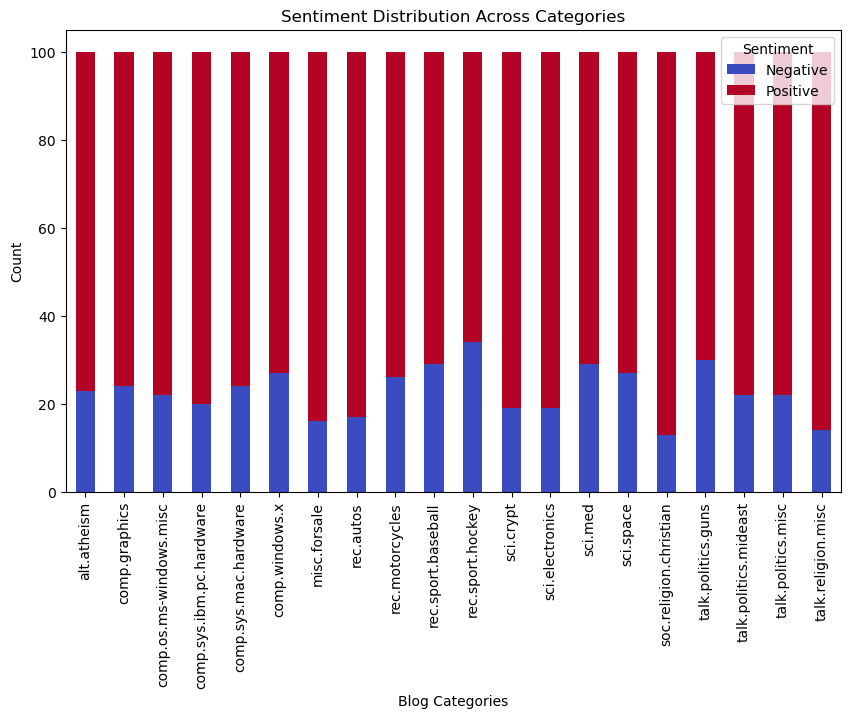

In [39]:
from textblob import TextBlob

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity  # Use the correct class name
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'


data['Sentiment'] = data['Data'].apply(get_sentiment)

# Analyze sentiment distribution across categories
sentiment_counts = data.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()


In [41]:
# Reflect on Naive Bayes performance
print("Final Accuracy of Naive Bayes Classifier:", accuracy_score(y_test, y_pred))

# Summary of sentiment analysis
sentiment_summary = data.groupby('Sentiment')['Labels'].count()
print("Sentiment Summary:\n", sentiment_summary)


Final Accuracy of Naive Bayes Classifier: 0.75
Sentiment Summary:
 Sentiment
Negative     457
Positive    1543
Name: Labels, dtype: int64
